# SC1003 Team Allocation Simulator

# Table of Contents
### [Project Background](#projectbackground)
### [Computational Thinking Process](#computationalthinking)
### [First Algorithm: GPA Optimization](#algo1)
### [Second Algorithm: Gender Optimization](#algo2)
### [Third Algorithm: School Optimization](#algo3)
### [Data Visualization and Statistics](#data)
### [Conclusion](#conclusion)
### [Final Reflections](#finalreflections)

# Project Background <a id="projectbackground"></a>
The "Introduction to Data Science" is a Year 1 course offered at NTU. This course attracts a diverse group of students from various disciplines due to its widespread applicability and popularity.
Recently, the course has experienced a significant increase in enrollment, with 6,000 students registered. These students are organized into 120 tutorial groups, each consisting of 50 students. The course coordinator is facing challenges in efficiently forming teams for a mini-project component of the course.

To address this issue, our application helps to organize students into teams of five for the data science mini-project, using the provided csv file (records.csv) consisting of 6,000 student records with their Tutorial Group, Student ID, Name, School, Gender, and CGPA. Our application ensures that teams comprise only members of the same tutorial group, and also ensures fairness and diversity when forming teams by considering the following factors:

**1. School Affiliation:** To ensure a mix of knowledge and skills, no team should have a majority of students from the same school.

**2. Gender:** To promote gender diversity, no team should have a majority of students of the same gender.

**3. Current CGPA:** To balance academic performance, teams should not consist predominantly of students with very high or very low CGPAs.

Our program strives for balanced and diverse team compositions, taking into account the above criteria.

# Computational Thinking Process <a id="computationalthinking"></a>

## Decomposition
This problem has many factors to consider, such as the 3 criterias for fairness and diversity. Therefore, decomposition would be useful to break the problem down into smaller and more manageable tasks, allowing us to tackle smaller problems one step at a time. We have broken down the problem as such:

**Read the student records dataset and save the data into a Python dictionary**:
   - Read the provided CSV file (records.csv) and save the student data into a new dictionary, where the key is the tutorial group and the values are the lists of students and the students records in that particular tutorial group.
   - This is especially important considering the restriction where no team should have 2 members from different tutorial groups.

**Ensure balanced and diverse team compositions**:
  - Once the students are split into their respective tutorial groups, we decide to sort the students into their teams of 5 according to the different conditions.  
- We decided to use a step-by-step approach to refine the team composition to achieve a more comprehensive evaluation and adjustment of each condition without adversely affecting the others.
- Furthermore, we created a checker function to show the optimization results after every algorithm, to ensure that the team composition has improved before moving on to the next algorithm.
- We decide to use CGPA as the first optimization factor as this provides a more manageable starting point for controlling subsequent conditions.
- After controlling CGPA, we seek to optimize the gender distribution and thereafter the school diversification by swapping members across teams.




## Pattern Recognition
-  For some of the loops in the code which are repetitive, we "factorise" them into functions to optimize our code.
-  This also leads to an improvement in efficiency and readability.
-  For instance, instead of dealing with all 6,000 students from the 120 tutorial groups simultaneously, we focus on each criteria, and dive deeper into the first tutorial group, before repeating the algorithms for all remaining tutorial groups.

**Algorithm 3: Optimizing teams by diversifying schools**
- We analyzed the maximum number of students in a particular school for each tutorial group and found that certain tutorial groups consists of more than 10 students from the same school.

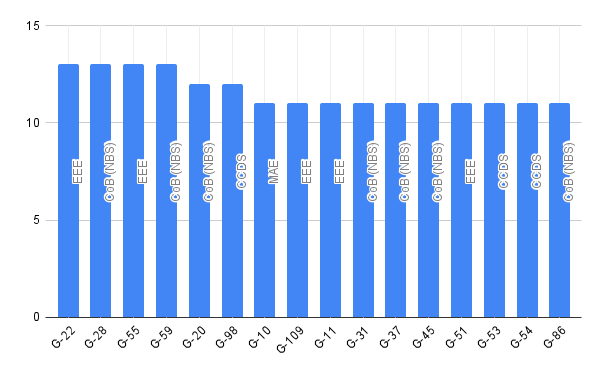


## Abstraction
We apply the concepts of abstraction throughout our program, such as the count_gender function which hides the inner complexities, while returning the number of students of a particular gender. Another example is the quick_stats function, which will be called at the end of every optimization to summarize the student distribution. This helps to modularize our code, allowing for neat and reusable operations throughout the program.

## Algorithm Design
After considering all the requirements for this project, our team has designed and implemented the algorithm as such:

1. **Algorithm 1: Initial assignment of student to teams based on CGPA**
- As there are 50 students per tutorial group to be assigned to 5 teams, we can visualize the problem this way:
- We sort the students according to their CGPA in ascending order
- We divide the students into 3 categories: 20 higher-CGPA students, 20 lower-CGPA students, 10 median-CGPA students
- For every team, we pick 2 higher-CGPA students, 2 lower-CGPA students and 1 median-CGPA student and put them in a team. Referencing the original student records, such an assignment is quite effective in ensuring that all teams in a tutorial group have a very close CGPA average to one another.

2. **Algorithm 2: Optimising teams by swapping genders across teams**
- We identify and prioritise schools with a significant amount of students, and within each tutorial group, select 10 of those with the highest GPA, regardless of gender. They are then assigned into initial teams.
- Consequently, fill in the empty spots in the teams by gender and GPA. Afterwards, gender optimisation by gender balancing-conditional and iteration statements for count of gender in each team.

3. **Algorithm 3: Optimizing teams by diversifying schools**
- As there are only 50 students per tutorial group, running 30 iterations of algorithm 3 is sufficient to ensure that each group of 5 students is well balanced.
- For students to swap between teams, student 1 from team 1 and student 2 from team 2 must have a CGPA difference of less than 0.3, student 1 and student 2 must have the same gender, and be from different schools.
- A scoring system is calculated using the formula: score = cgpa_diff *10 - diveristy_gain *100 where diveristy_gain ranges from 3 to -2 (3 being the highest improvement for the diversity of the group, and -2 means worsening the diversity of the group)
- diversity_gain +=3 if count of school in the same group >=3​. This is to prioritize swapping the majority.
- diversity_gain +=2 if count of school from the other group is currently 0 in the receiving team.
- diversity_gain -=2 if count of school being introduced is >=2​. This is to prevent over concentration of schools.
- We only perform the swap if the team is proven to be more diverse with minimal impact on the CGPA distribution. This is achieved by swapping 2 students from different groups with the lowest score using the scoring system.

# Import the required libraries

In [1]:
import statistics
import matplotlib.pyplot as plt
import numpy as np
import csv

#  Read student records (csv) and save the data into a dictionary

In [2]:
# Read the data from records.csv and save it into a Python dictionary
# The dictionary is a nested dictionary with the structure {'Tutorial_Group': [ 50 dictionaries {Student Data}  ] * 120 Tutorial Groups}

def create_students_dict():
    with open('records.csv','r') as student_records:
        student_records_raw_data = student_records.readlines()

        # Create the nested dictionary
        students_dict = {}

        # Save the student data into a dictionary, with tutorial group as key and list of student records as value
        for row in student_records_raw_data[1:]: # Ignore the header row
            student_record = row.split(',')
            student_record[5] = float(student_record[5]) # Convert student GPA into float data type, which also removes the newline \n from original GPA data
            if student_record[0] not in students_dict:
                students_dict[student_record[0]] = [] # If the tutorial group does not exist in the dictionary keys, create it and assign an empty list as value
            students_dict[student_record[0]].append(  # Append the student data into the list of students for a particular tutorial group
                {
                'Tutorial Group': student_record[0],
                'ID': student_record[1],
                'School': student_record[2],
                'Name': student_record[3],
                'Gender': student_record[4],
                'CGPA': student_record[5]
                },
            )

    return students_dict

students = create_students_dict()
print(students)

{'G-1': [{'Tutorial Group': 'G-1', 'ID': '5002', 'School': 'CCDS', 'Name': 'Aarav Singh', 'Gender': 'Male', 'CGPA': 4.02}, {'Tutorial Group': 'G-1', 'ID': '3838', 'School': 'EEE', 'Name': 'Aarti Nair', 'Gender': 'Female', 'CGPA': 4.05}, {'Tutorial Group': 'G-1', 'ID': '2091', 'School': 'EEE', 'Name': 'Adlan Bin Rahman', 'Gender': 'Male', 'CGPA': 4.2}, {'Tutorial Group': 'G-1', 'ID': '288', 'School': 'CoB (NBS)', 'Name': 'Ajay Verma', 'Gender': 'Male', 'CGPA': 4.01}, {'Tutorial Group': 'G-1', 'ID': '4479', 'School': 'CCDS', 'Name': 'Amelia Kim', 'Gender': 'Female', 'CGPA': 4.11}, {'Tutorial Group': 'G-1', 'ID': '5708', 'School': 'SoH', 'Name': 'Ananya Ramesh', 'Gender': 'Male', 'CGPA': 4.2}, {'Tutorial Group': 'G-1', 'ID': '4563', 'School': 'WKW SCI', 'Name': 'Anjali Patel', 'Gender': 'Female', 'CGPA': 4.01}, {'Tutorial Group': 'G-1', 'ID': '3989', 'School': 'WKW SCI', 'Name': 'Anthony Liu', 'Gender': 'Male', 'CGPA': 4.15}, {'Tutorial Group': 'G-1', 'ID': '2115', 'School': 'EEE', 'Name'

# Helper Functions
We implement helper functions that can be reused across the different algorithms, as part of modularity. These include the performing of student swaps, summarizing of statistics, and finding the number of students of a particular gender.

In [3]:
# Swap two students between teams
def perform_student_swap(teams, team_index1, team_index2, student1, student2):
  student1_position = teams[team_index1].index(student1)
  student2_position = teams[team_index2].index(student2)
  teams[team_index1][student1_position], teams[team_index2][student2_position] = teams[team_index2][student2_position], teams[team_index1][student1_position] # Swap operation

def count_gender(team, gender):
    count = 0
    for student in team:
        if student['Gender'] == gender:
            count += 1
    return count

# Check team statistics and show key metrics after every sorting algorithm, to show improvement in team distribution
def quick_stats(dict_of_teams):
    gender_counts = {'5-0': 0, '4-1': 0, '3-2': 0, '2-3': 0, '1-4': 0, '0-5': 0} # Gender count
    ranges, stdevs, avg_cgpas = [], [], [] # CGPA metrics
    school_diversity_counts = {}  # Check how many distinct schools per team

    # Process all team
    for teams in dict_of_teams.values():
        for team in teams:
            # Gender distribution analysis
            male_count = count_gender(team, 'Male')
            female_count = count_gender(team, 'Female')
            gender_key = str(male_count) + "-" + str(female_count)
            gender_counts[gender_key] = gender_counts.get(gender_key, 0) + 1
            # CGPA analysis
            team_cgpas = [student['CGPA'] for student in team]
            ranges.append(max(team_cgpas) - min(team_cgpas))
            stdevs.append(statistics.stdev(team_cgpas))
            avg_cgpas.append(sum(team_cgpas) / len(team_cgpas))
            # School diversity analysis
            num_schools = len(set(student['School'] for student in team)) # We only need to count the number of unique schools (no duplicates)
            school_diversity_counts[num_schools] = school_diversity_counts.get(num_schools, 0) + 1

    total_teams = sum(len(teams) for teams in dict_of_teams.values())

    print("\nGENDER DISTRIBUTION (" + str(total_teams) + ")")
    balanced = gender_counts.get('3-2', 0) + gender_counts.get('2-3', 0) # We obtain the number of teams with 2-3 or 3-2 gender distribution
    imbalanced_4_1 = gender_counts.get('4-1', 0) + gender_counts.get('1-4', 0)
    same = gender_counts.get('5-0', 0) + gender_counts.get('0-5', 0)
    print("Balanced (3-2/2-3): ", str(balanced), "(" + str(balanced / total_teams * 100)[:5],"%)") # We display both the number as well as the percentage of total teams
    print("Imbalanced (4-1/1-4):", str(imbalanced_4_1), "(" + str(imbalanced_4_1 / total_teams * 100)[:5], "%)")
    print("Same gender (5-0/0-5):", str(same), "(" +  str(same / total_teams * 100)[:5], "%)")

    print("\nCGPA BALANCE:")
    print("Avg CGPA:", str(sum(avg_cgpas) / len(avg_cgpas))[:5])
    print("Avg Range:", str(sum(ranges) / len(ranges))[:5], "(min:", str(min(ranges))[:5], "max:", str(max(ranges))[:5] + ")")
    print("Avg Std Dev:", str(sum(stdevs) / len(stdevs))[:5])

    print("\nSCHOOL DIVERSITY:")
    for num_schools in sorted(school_diversity_counts.keys()):
        count = school_diversity_counts[num_schools]
        print(str(num_schools), "schools:", str(count), "teams (" + str(count / total_teams * 100)[:5] + "%)")

    # Return stats dictionary for data visualization at the end of all sorting
    return {'total_teams': total_teams, 'gender': {'balanced': balanced, 'imbalanced_4_1': imbalanced_4_1, 'same': same, 'distribution': gender_counts}, 'cgpa': {'avg': sum(avg_cgpas)/len(avg_cgpas), 'avg_range': sum(ranges)/len(ranges), 'avg_stdev': sum(stdevs)/len(stdevs),}, 'school_diversity': school_diversity_counts}

# Algorithm 1: Sort solely by CGPA first  <a id="algo1"></a>

In [4]:
# Set the values of the constants - no. of students in a tutorial group, no. of teams and no. of team members
NO_OF_STUDENTS_TUTORIAL_GROUP = 50
NO_OF_TEAMS = 10
NO_OF_TEAM_MEMBERS = 5

def initial_sort_by_gpa(students):
    dict_of_all_teams = {} # key: tutorial group, value: nested list - list of teams (team members are in a list) in that tutorial group
    for tutorial_group, student_list in students.items(): # Iterates through student records by individual tutorial group
        list_of_teams_by_tutorial_group = [[] for _ in range(NO_OF_TEAMS)]  # Creates 10 empty teams
        students_sort_by_gpa = sorted(student_list, key = lambda student:student['CGPA'])  # Sort students in each tutorial group in ascending order of GPA
        """
        Our approach involves assigning students to teams in the following order:
        1. Next student with the highest GPA to be included in the next team. This will run for 2 iterations.
        2. Next student with the lowest GPA to be included in the next team. This will run for 2 iterations.
        3. Pick median GPA students for each team to minimize deviation from average CGPA.
        Essentially, we are converging from both ends of the sorted CGPA list towards the median.
        """
        low_index = 0
        high_index = len(students_sort_by_gpa) - 1

        # List of median indexes (20 to 29), we will assign student at index 20 to team 1, index 21 to team 2, etc.
        median_index = [NO_OF_STUDENTS_TUTORIAL_GROUP // 2 - NO_OF_TEAMS//2 + i for i in range(NO_OF_TEAMS)]

        # Assign 2 high CGPA students to each team
        for round in range(2):
            for i in range(NO_OF_TEAMS):
                list_of_teams_by_tutorial_group[i].append(students_sort_by_gpa[high_index]) # Assign the current student with the highest CGPA to the next team
                high_index -= 1 # Decrease the student index (moving on to the next student with highest CGPA)

        # Assign 2 low CGPA students to each team
        for round in range(2):
            for i in range(NO_OF_TEAMS):
                list_of_teams_by_tutorial_group[i].append(students_sort_by_gpa[low_index]) # Assign the current student with the lowest CGPA to the next team
                low_index += 1 # Increase the student index (moving on to the next student with lowest CGPA)

        # Assign 1 median CGPA student to each team
        for i in range(NO_OF_TEAMS):
            list_of_teams_by_tutorial_group[i].append(students_sort_by_gpa[median_index[i]])

        dict_of_all_teams[tutorial_group] = list_of_teams_by_tutorial_group

    return dict_of_all_teams

# Check Distribution After Algorithm 1: CGPA Sort
dict_of_all_teams = initial_sort_by_gpa(students)
stats_after_cgpa = quick_stats(dict_of_all_teams)


GENDER DISTRIBUTION (1200)
Balanced (3-2/2-3):  762 (63.5 %)
Imbalanced (4-1/1-4): 350 (29.16 %)
Same gender (5-0/0-5): 88 (7.333 %)

CGPA BALANCE:
Avg CGPA: 4.088
Avg Range: 0.306 (min: 0.110 max: 1.119)
Avg Std Dev: 0.118

SCHOOL DIVERSITY:
2 schools: 13 teams (1.083%)
3 schools: 147 teams (12.25%)
4 schools: 554 teams (46.16%)
5 schools: 486 teams (40.5%)


# Algorithm 2 : Optimise existing teams by swapping genders across teams  <a id="algo2"></a>

In [5]:
# CATEGORISE TEAMS BY GENDER DISTRIBUTION
def categorize_teams_by_gender(teams):
    all_male_teams = []
    all_female_teams = []
    male_heavy_teams = []      # 4M-1F GENDER RATIO
    female_heavy_teams = []    # 1M-4F GENDER RATIO
    balanced_teams = []        # 2M-3F or 3M-2F GENDER RATIO

    for team_index, team in enumerate(teams): # Upon enumeration, we get both the team index and team records
        no_of_males = count_gender(team, 'Male') # We simply need to count students of a particular gender; the other gender count will be taken through subtraction
        # Account for all possible cases
        if no_of_males == 5:
            all_male_teams.append(team_index)
        elif no_of_males == 0:
            all_female_teams.append(team_index)
        elif no_of_males == 4:
            male_heavy_teams.append(team_index)
        elif no_of_males == 1:
            female_heavy_teams.append(team_index)
        else:  # no_of_males is 2 or 3 (2-3 distribution is most ideal result)
            balanced_teams.append(team_index)
    return all_male_teams, all_female_teams, male_heavy_teams, female_heavy_teams, balanced_teams

# Abstract the function of finding best swap pair between two different genders and two different teams
# In some cases, may need to swap male with female or the other way round (depending on which is more dominant)
def find_best_swap_pair(team1, team2, gender1, gender2, max_cgpa_diff = 0.5):
    students_with_gender1, students_with_gender2 = [], [] # We start off with declaring 2 empty lists
    #if the students belong to a particular gender, we assign them to a list
    for student in team1:
        if student['Gender'] == gender1:
            students_with_gender1.append(student)
    for student in team2:
        if student['Gender'] == gender2:
            students_with_gender2.append(student)
    best_cgpa_diff = float('inf') # placeholder value for the CGPA difference; try to maintain it while swapping genders
    best_swap_pair = None
    for student1 in students_with_gender1:
        # as much as possible, we try to swap students of 2 different genders, with minimal CGPA difference
        for student2 in students_with_gender2:
            cgpa_diff = abs(student1['CGPA'] - student2['CGPA'])
            if cgpa_diff < best_cgpa_diff:
              best_cgpa_diff = cgpa_diff # Find the minimum CGPA difference between students of 2 different genders
              best_swap_pair = (student1, student2)
    if best_swap_pair != None and best_cgpa_diff < max_cgpa_diff:
      return best_swap_pair
    else:
      return None

# MAIN GENDER OPTIMISATION FUNCTION, WITH THE AIM OF ACHIEVEING AS MANY TEAMS WITH A GENDER RATIO OF 3-2
def balance_gender(dict_of_all_teams):
  """
  We attempt to optimise gender distribution with varying priority:
  1. Fix all-male (5-0) - higher priority
  2. Fix all-female (0-5) teams
  3. Balance male-heavy (4-1) and female-heavy (1-4) teams with each other
  4. Further reduce 4-1 teams by swapping with 2-3 balanced teams - lower priority
  """
  for tutorial_group, teams in dict_of_all_teams.items():
    max_iterations = NO_OF_STUDENTS_TUTORIAL_GROUP
    for iteration in range(max_iterations):
      student_swapped = False
      all_male_teams, all_female_teams, male_heavy_teams, female_heavy_teams, balanced_teams = categorize_teams_by_gender(teams)
      # Start off with fixing all-male teams (5-0)
      for all_male_team_index in all_male_teams:
        for other_team_index in range(len(teams)):
          if other_team_index != all_male_team_index:
            female_count_in_other_team = count_gender(teams[other_team_index], 'Female')
            if female_count_in_other_team >= 2:
              swap_pair = find_best_swap_pair(teams[all_male_team_index], teams[other_team_index], 'Male', 'Female')
              if swap_pair:
                male_student, female_student = swap_pair
                perform_student_swap(teams, all_male_team_index, other_team_index, male_student, female_student)
                student_swapped = True
                break
        if student_swapped:
          break
      # Fix all-female teams (0-5)
      if not student_swapped:
        for all_female_team_index in all_female_teams:
          for other_team_index in range(len(teams)):
            if other_team_index != all_female_team_index:
              male_count_in_other_team = count_gender(teams[other_team_index], 'Male')
              if male_count_in_other_team >= 2:
                swap_pair = find_best_swap_pair(teams[all_female_team_index], teams[other_team_index], 'Female', 'Male')
                if swap_pair:
                  female_student, male_student = swap_pair
                  perform_student_swap(teams, all_female_team_index, other_team_index, female_student, male_student)
                  student_swapped = True
                  break
          if student_swapped:
              break
      # Balance 4-1 imbalances with each other (4M-1F with 1M-4F)
      if not student_swapped:
        for male_heavy_team_index in male_heavy_teams:
          for female_heavy_team_index in female_heavy_teams:
            swap_pair = find_best_swap_pair(teams[male_heavy_team_index], teams[female_heavy_team_index], 'Male', 'Female')
            if swap_pair:
              male_student, female_student = swap_pair
              perform_student_swap(teams, male_heavy_team_index, female_heavy_team_index, male_student, female_student)
              student_swapped = True
              break
          if student_swapped:
              break
      # Reduce remaining 4M-1F teams by swapping with 2-3 balanced teams
      if not student_swapped and male_heavy_teams and balanced_teams:
        for male_heavy_team_index in male_heavy_teams:
          for balanced_team_index in balanced_teams:
            male_count_in_balanced = count_gender(teams[balanced_team_index], 'Male')
            female_count_in_balanced = count_gender(teams[balanced_team_index], 'Female')
            # Only swap if balanced team has at least 2 females (to give one away)
            if female_count_in_balanced >= 2:
              swap_pair = find_best_swap_pair(teams[male_heavy_team_index], teams[balanced_team_index], 'Male', 'Female')
              if swap_pair:
                male_student, female_student = swap_pair
                perform_student_swap(teams, male_heavy_team_index, balanced_team_index, male_student, female_student)
                break
          if student_swapped:
            break
      # Reduce remaining 1M-4F teams by swapping with 2-3 balanced teams
      if not student_swapped and female_heavy_teams and balanced_teams:
        for female_heavy_team_index in female_heavy_teams:
          for balanced_team_index in balanced_teams:
            male_count_in_balanced = count_gender(teams[balanced_team_index], 'Male')
            # Only swap if balanced team has at least 2 males (to give 1 away)
            if male_count_in_balanced >= 2:
              swap_pair = find_best_swap_pair(teams[female_heavy_team_index], teams[balanced_team_index], 'Female', 'Male')
              if swap_pair:
                female_student, male_student = swap_pair
                perform_student_swap(teams, female_heavy_team_index, balanced_team_index, female_student, male_student)
                break
          if student_swapped:
            break
      # No longer making anymore swaps
      if not student_swapped:
        break
  return dict_of_all_teams

# After Algorithm 2: Gender Optimisation
dict_of_all_teams = balance_gender(dict_of_all_teams)
stats_after_gender = quick_stats(dict_of_all_teams)


GENDER DISTRIBUTION (1200)
Balanced (3-2/2-3):  1045 (87.08 %)
Imbalanced (4-1/1-4): 155 (12.91 %)
Same gender (5-0/0-5): 0 (0.0 %)

CGPA BALANCE:
Avg CGPA: 4.088
Avg Range: 0.306 (min: 0.110 max: 1.119)
Avg Std Dev: 0.118

SCHOOL DIVERSITY:
2 schools: 11 teams (0.916%)
3 schools: 141 teams (11.75%)
4 schools: 550 teams (45.83%)
5 schools: 498 teams (41.5%)


# Algorithm 3 : Optimize existing teams by diversifying schools <a id="algo3"></a>

In [6]:
#Get the count of each school in a team from the dict
def get_school_count(team):
    school_count_dict = {}
    for student in team:
        school_count_dict[student["School"]] = school_count_dict.get(student["School"], 0) + 1
    return school_count_dict

#find the best student pair to swap via scoring system that improves sch diversity, without changing the gender
#minimum cgpa diff between the two students
def find_school_swap(team1, team2, max_cgpa_dif = 0.3):
    school_count_team1 = get_school_count(team1)
    school_count_team2 = get_school_count(team2)

    best_score = float('inf') #initialise best_score to positive inf so that we can compare it and get the min score
    best_swap = None        #initialise best_swap to None

    for student in team1:
        for student2 in team2:
            cgpa_diff = abs(student["CGPA"] -  student2["CGPA"])

            #students with high cgpa will not be considered for swaps
            if cgpa_diff > max_cgpa_dif:
                continue

            #students from the same school or different gender will not be considered for swaps
            if student["School"] == student2["School"] or  student["Gender"] != student2["Gender"]:
                continue

            diversity_gain = 0


            #Add diversity points for repeated school to incentivize removing him/her
            #Add diversity points for schools not found in the other team to promote a mix of schools
            #Prioritize removing the majority of students, therefore reducing majority have a higher weight than rewarding new school
            if school_count_team1[student['School']] >= 3:  # Reduces majority
                diversity_gain += 3
            if school_count_team2.get(student2['School'], 0) == 0:  # New school
                diversity_gain += 2

            if school_count_team2[student2['School']] >= 3:  # Reduces majority
                diversity_gain += 3
            if school_count_team1.get(student['School'], 0) == 0:  # New school
                diversity_gain += 2

            # Avoid creating new majorities by reducing diversity points
            if school_count_team2.get(student['School'], 0) >= 2:
                diversity_gain -= 2
            if school_count_team1.get(student2['School'], 0) >= 2:
                diversity_gain -= 2

            #minimize cgpa difference while gaining diversity
            #we want the lowest score for minimal impact between teams
            score = cgpa_diff * 10 - diversity_gain * 100

            # We only perform the swap if the team is proven to be more diverse, with minimal impact on the CGPA distribution (gender is already dealt with at the start of the loop)
            if diversity_gain > 0 and score < best_score:
                best_score = score
                best_swap = (student, student2)

    return best_swap

#optimize school distributions while maintaining the same gender distribution and min cgpa diff
def balance_school(dict_of_all_teams, max_iterations = 30):
    for teams in dict_of_all_teams.values():
        for _ in range(max_iterations):

            # initialize swap
            swap_made = False

            #find team with more than 3 students from the same school and add to majority team list
            majority_teams = []
            for i, team in enumerate(teams):
                school_count = get_school_count(team).values()
                has_majority = False
                for count in school_count:
                    if count >= 3:
                        has_majority = True
                        break

                if has_majority:
                    majority_teams.append(i)

            #try to fix teams with the majority first
            for i in majority_teams:
                for j in range(len(teams)):
                    if i == j:
                        continue

                    swap_targets = find_school_swap(teams[i], teams[j])
                    if swap_targets:
                        student, student2 = swap_targets
                        perform_student_swap(teams, i, j, student, student2)
                        swap_made = True
                        break
                if swap_made:
                    break

            #if no majority issues, improve general diversity
            if not swap_made:
                for i in range(len(teams)):
                    for j in range(len(teams)):
                        swap_targets = find_school_swap(teams[i], teams[j])
                        if swap_targets:
                            student, student2 = swap_targets
                            perform_student_swap(teams, i, j, student, student2)
                            swap_made = True
                            break
                    if swap_made:
                        break

            #terminate early if there is no best swap
            if not swap_made:
                break

    return dict_of_all_teams

# Check Distribution after algo 3
dict_of_all_teams = balance_school(dict_of_all_teams)
stats_after_school = quick_stats(dict_of_all_teams)



GENDER DISTRIBUTION (1200)
Balanced (3-2/2-3):  1045 (87.08 %)
Imbalanced (4-1/1-4): 155 (12.91 %)
Same gender (5-0/0-5): 0 (0.0 %)

CGPA BALANCE:
Avg CGPA: 4.088
Avg Range: 0.305 (min: 0.110 max: 1.119)
Avg Std Dev: 0.118

SCHOOL DIVERSITY:
3 schools: 95 teams (7.916%)
4 schools: 622 teams (51.83%)
5 schools: 483 teams (40.25%)


# Data Visualisation and Statistics <a id="data"></a>

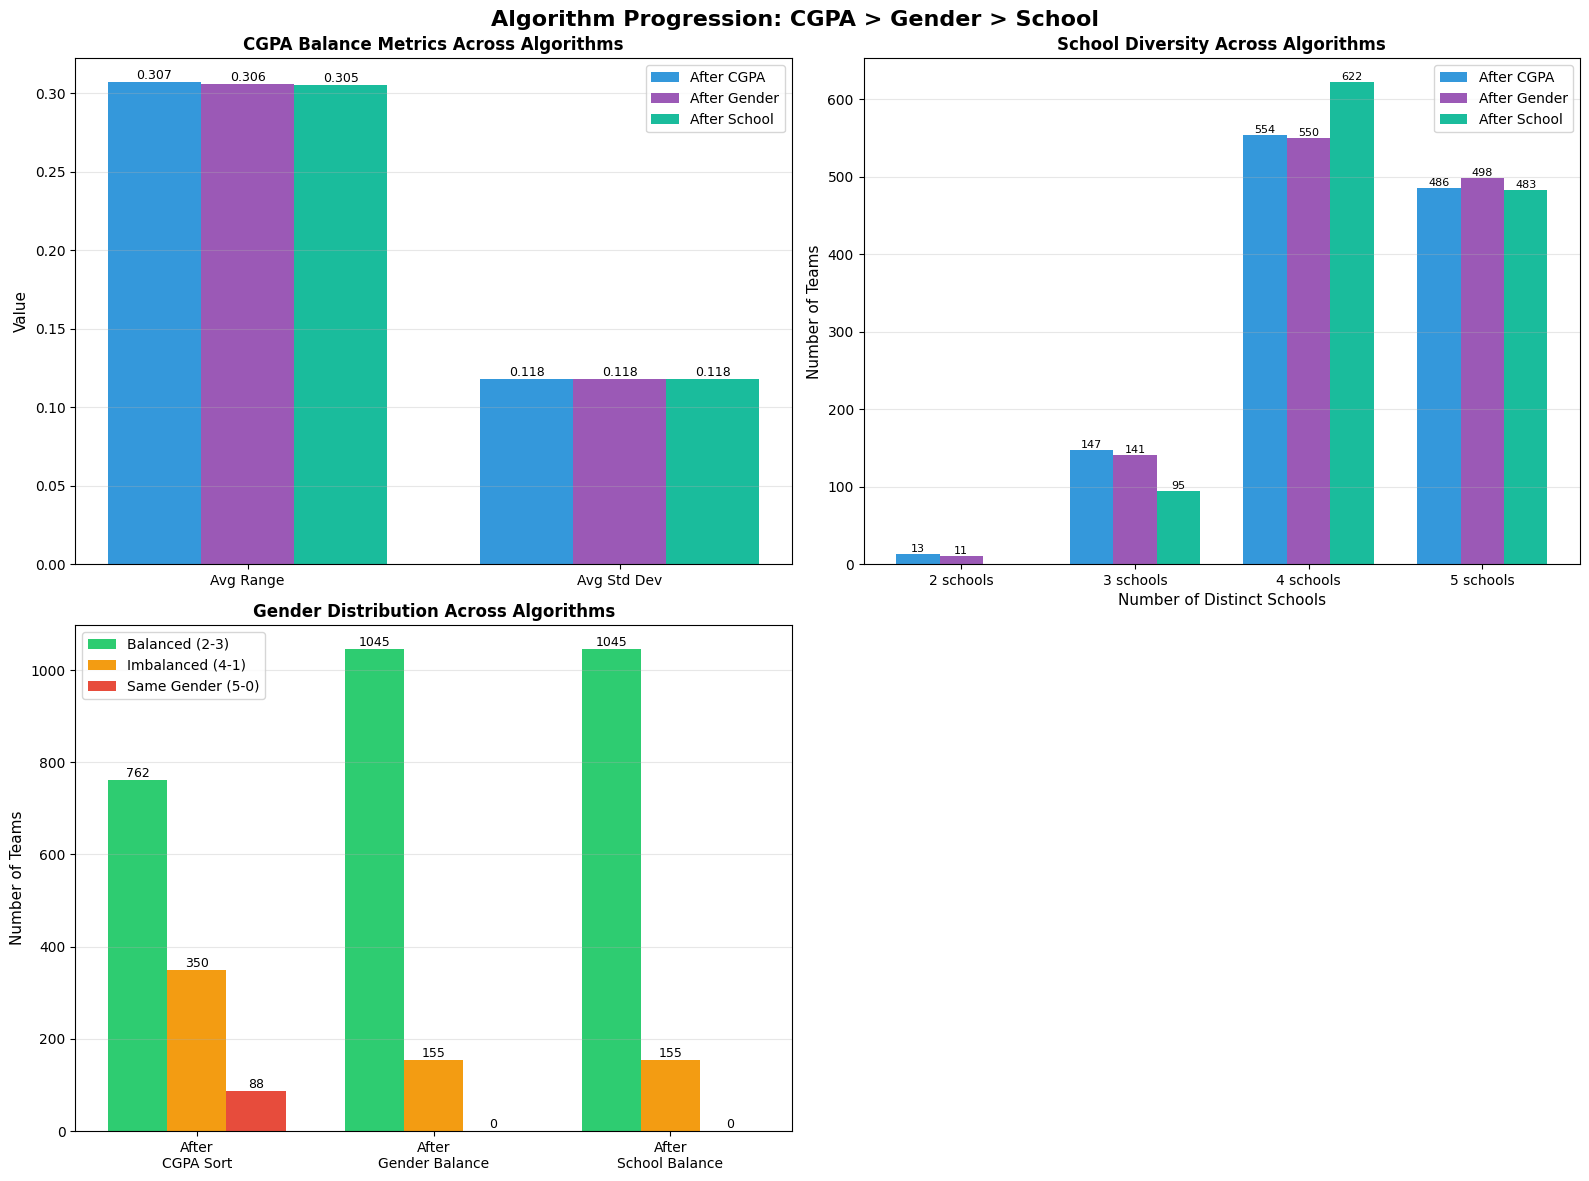

In [7]:
# We want to visualize how the three algorithms progressively improve team quality
def visualize_stats(after_cgpa_stats, after_gender_stats, after_school_stats):
  fig, axes = plt.subplots(2, 2, figsize=(16, 12)) # 2 by 2 presentation - 4 graphs; 16inches wide and 12 inches tall graphs
  fig.suptitle('Algorithm Progression: CGPA > Gender > School', fontsize = 16, fontweight = 'bold') #Title of canvas that display the graphs

  # First graph for CGPA Metrics Comparison
  first_graph = axes[0, 0] #Locating the first graph on the canvas

  metrics = ['Avg Range', 'Avg Std Dev']
  # Creating 2 lists (range and standard deviation) within 3 different rows (after each filter)
  cgpa_metrics = [[after_cgpa_stats['cgpa']['avg_range'],
                   after_cgpa_stats['cgpa']['avg_stdev']],
                  [after_gender_stats['cgpa']['avg_range'],
                   after_gender_stats['cgpa']['avg_stdev']],
                  [after_school_stats['cgpa']['avg_range'],
                   after_school_stats['cgpa']['avg_stdev']]]
  x = np.arange(len(metrics))
  width = 0.25 #width of each bar
  colors = ['#3498db', '#9b59b6', '#1abc9c']
  labels = ['After CGPA', 'After Gender', 'After School']

  for i in range(3):
    offset = (i - 1) * width
    bars = first_graph.bar(x + offset, cgpa_metrics[i], width, label = labels[i], color = colors[i])
    for bar in bars:
      height = bar.get_height()
      first_graph.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.3f}', ha = 'center', va = 'bottom', fontsize =9 )

  first_graph.set_ylabel('Value', fontsize = 11)
  first_graph.set_title('CGPA Balance Metrics Across Algorithms', fontsize = 12, fontweight = 'bold')
  first_graph.set_xticks(x)
  first_graph.set_xticklabels(metrics)
  first_graph.legend()
  first_graph.grid(axis = 'y', alpha = 0.3)

  # Second graph for Gender Distribution Comparison
  second_graph = axes[1,0] #Locating the second graph on the canvas

  stages = ['After\nCGPA Sort', 'After\nGender Balance', 'After\nSchool Balance'] # Labels for x-axis
  # Creates a list of 3 dictionaries, each dictionary holds the statistics summary after each sorting algorithm
  balanced = [after_cgpa_stats['gender']['balanced'], after_gender_stats['gender']['balanced'], after_school_stats['gender']['balanced']]
  imbalanced_4_1 = [after_cgpa_stats['gender']['imbalanced_4_1'], after_gender_stats['gender']['imbalanced_4_1'], after_school_stats['gender']['imbalanced_4_1']]
  same = [after_cgpa_stats['gender']['same'], after_gender_stats['gender']['same'], after_school_stats['gender']['same']]
  x = np.arange(len(stages)) #Middle point of each stage visualization on the canvas

  #Location, List to get value from, width of each group, label and color)
  first_bars = second_graph.bar(x - width, balanced, width, label = 'Balanced (2-3)', color = '#2ecc71')
  second_bars = second_graph.bar(x, imbalanced_4_1, width, label = 'Imbalanced (4-1)', color = '#f39c12')
  third_bars = second_graph.bar(x + width, same, width, label = 'Same Gender (5-0)', color = '#e74c3c')
  second_graph.set_ylabel('Number of Teams', fontsize = 11) #Set y-axis label
  second_graph.set_title('Gender Distribution Across Algorithms', fontsize = 12, fontweight = 'bold') #Set Title
  second_graph.set_xticks(x) #Set tick positions
  second_graph.set_xticklabels(stages) #Intorduce the label for each tick position
  second_graph.legend() #put in the legend
  second_graph.grid(axis = 'y', alpha = 0.3) #Include gridline and state transparency level

  # Add the value labels
  for bars in [first_bars, second_bars, third_bars]:
    for bar in bars:
      height = bar.get_height()
      second_graph.text(bar.get_x() + bar.get_width() / 2., # Get the x-location to put annotation (middle of each bar)
                       height, # Get the y-location to put annotation (on top of each bar)
                       str(int(height)), #convert height to string for function to read
                       ha = 'center', #Horizontal Alignment
                       va = 'bottom', #Vertical Aligmnet
                       fontsize = 9) # font size


# Third graph for School Diversity Comparison
  third_graph = axes[0,1] #Locating the third graph on the canvas

  # Get all unique school counts
  # Getting the list of unique school names after looking through all the data in lists
  school_nums = sorted(set(list(after_cgpa_stats['school_diversity'].keys()) + list(after_gender_stats['school_diversity'].keys()) + list(after_school_stats['school_diversity'].keys()))) #Arranging the variety in ascending order in a set after removing duplicates
  #Creating a dictionary with each filter as a key and their output as value
  school_data = {'After CGPA': [after_cgpa_stats['school_diversity'].get(n, 0) for n in school_nums], 'After Gender': [after_gender_stats['school_diversity'].get(n, 0) for n in school_nums], 'After School': [after_school_stats['school_diversity'].get(n, 0) for n in school_nums]}
  x = np.arange(len(school_nums))


  # Loop through each stage and its data
  for i, (stage, counts) in enumerate(school_data.items()):
      # Shift bars left or right so they don't overlap
      offset = (i - 1) * width
      # Draw the bars for this stage
      bars = third_graph.bar(x + offset, counts, width, label = stage, color = colors[i])

      # Add number labels on top of each bar
      for bar in bars:
          height = bar.get_height()  # Get the height of the bar
          if height > 0:  # Only label bars with positive height
              # Place the label at the center-top of the bar, same as above
              third_graph.text(bar.get_x() + bar.get_width() / 2., height, str(int(height)), ha = 'center', va = 'bottom', fontsize = 8)

  third_graph.set_ylabel('Number of Teams', fontsize = 11)
  third_graph.set_title('School Diversity Across Algorithms', fontsize = 12, fontweight = 'bold')
  third_graph.set_xlabel('Number of Distinct Schools', fontsize = 11)
  third_graph.set_xticks(x)
  third_graph.set_xticklabels([f'{n} schools' for n in school_nums])
  third_graph.legend()
  third_graph.grid(axis = 'y', alpha = 0.3)




  # Remove the unused axis on the bottom right of the chart
  fig.delaxes(axes[1, 1])

  plt.tight_layout()
  plt.show()

# Call the visualization function
visualize_stats(stats_after_cgpa, stats_after_gender, stats_after_school)

# Write Final Teams to a new CSV file <a id="convert"></a>

We have also sorted the new CSV file in increasing order of the tutorial group number (e.g. G-1, G-2, G-3, ..., G-120), instead of the original order which was based on text sorting and did not follow numerical order.

In [ ]:
# writing to a new file
with open('final_allocation.csv', 'w', newline = '') as file:
    writer = csv.writer(file)
    header = ['Tutorial Group', 'Student ID', 'School', 'Name', 'Gender', 'CGPA', 'Team Assigned']
    writer.writerow(header)

    for group_key in sorted(dict_of_all_teams.keys(), key=lambda x: int(x.split('-')[1])):
        tutorial_group = dict_of_all_teams[group_key]
        for team_idx, group in enumerate(tutorial_group):
            for student in group:
                student_details = []
                for detail in student.values():
                    student_details.append(detail)
                student_details.append(team_idx + 1)  # Append the team assigned and add the data to the Team Assigned column in the CSV file
                writer.writerow(student_details)

# Conclusion <a id="conclusion"></a>

We have successfully created an algorithm to distribute students into well-balanced subgroups based on multiple factors: CGPA, gender balance, and school affiliation after trying various models.

This model provided the best result along with being highly readable and suitable for debugging as we took a systematic approach in this model.

## Key Discovery

Looking back at the main objective of the project which is to achieve fairness and diversity in the aspects of School Affiliation, Gender, and Current CGPA, these are our key discovery that proved the effectiveness of our algorithm:

1. Gender:
   - The agenda was to create groups with 3 to 2 or 2 to 3 guy-girl ratio
   - After implementing the algorithm, we were able to eliminate all single-gendered groups
   - The code also decreased the number of groups predominately male or female (4 to 1 ratios)

2. Current CGPA:
   - The Agenda was to let the average CGPA of each team be as close to the cohort average CGPA as possible
   - We managed to reduces the average range
   - We managed to maintain the standard variation to be the same as the given data too.

3. School Affiliation:
   - The Agenda was to increase variation of school affiliation as much as possible
   - We managed to achieve a variation of 4 to 5 school for over 85% of the groups


## Areas for Future Improvement
1. The model can be applicable for different input and output size (e.g. no. of team members in a team)


# Final Reflections <a id="finalreflections"></a>


We were able to create a highly efficient model to delegate students in the same tutorial groups into teams which accounts for a balance in gender, CGPA and school affiliation. This was achieved through filtering the given data in the similar sequence and it helped to make each team as diverse as possible without giving any team any specific advantage.

In the future, the model could be improved to be able to take in data with varying numbers of students in each tutorial group and create teams without a different number of team members besides having 5.
